In [2]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os



In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [5]:

data_all_columns = pd.read_csv("all_columns.csv",low_memory=False)

In [118]:
data_all_columns.columns

Index(['station_id', 'year', 'month', 'day', 'weekday', 'hour', 'availability',
       'availability_1h_before', 'availability_2h_before',
       'availability_3h_before', 'availability_4h_before', 'lat', 'lon',
       'altitude', 'post_code', 'capacity', 'VALOR_LECTURA', 'holiday',
       'day_category', 'altitude_cat'],
      dtype='object')

In [7]:
data_all_columns['day_category'].unique()

array([2, 3, 4, 1])

## Geospatial Info x Availiblity

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [38]:
data_6am_weekday = data_all_columns[data_all_columns['hour'].isin([6])][data_all_columns['day_category'].isin([1])]

data_8am_weekday = data_all_columns[data_all_columns['hour'].isin([8])][data_all_columns['day_category'].isin([1])]

data_10am_weekday = data_all_columns[data_all_columns['hour'].isin([10])][data_all_columns['day_category'].isin([1])]

data_2pm_weekday = data_all_columns[data_all_columns['hour'].isin([14])][data_all_columns['day_category'].isin([1])]

data_4pm_weekday = data_all_columns[data_all_columns['hour'].isin([16])][data_all_columns['day_category'].isin([1])]

data_6pm_weekday = data_all_columns[data_all_columns['hour'].isin([18])][data_all_columns['day_category'].isin([1])]

data_8pm_weekday = data_all_columns[data_all_columns['hour'].isin([20])][data_all_columns['day_category'].isin([1])]

data_10pm_weekday = data_all_columns[data_all_columns['hour'].isin([22])][data_all_columns['day_category'].isin([1])]


/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/4045380329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_6am_weekday = data_all_columns[data_all_columns['hour'].isin([6])][data_all_columns['day_category'].isin([1])]
/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/4045380329.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_8am_weekday = data_all_columns[data_all_columns['hour'].isin([8])][data_all_columns['day_category'].isin([1])]
/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/4045380329.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_10am_weekday = data_all_columns[data_all_columns['hour'].isin([10])][data_all_columns['day_category'].isin([1])]
/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/4045380329.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2pm_w

<AxesSubplot:xlabel='lon', ylabel='lat'>

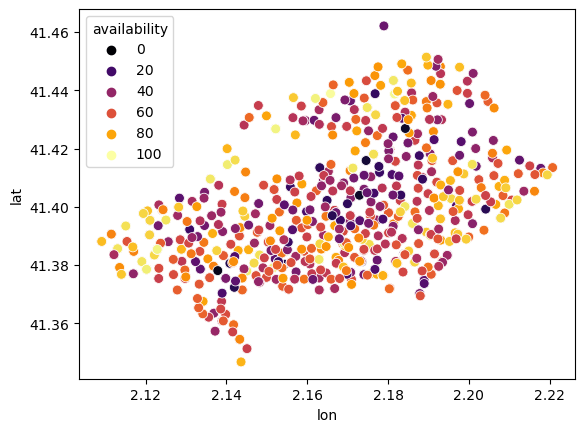

In [202]:
sns.scatterplot(data=data_6am_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

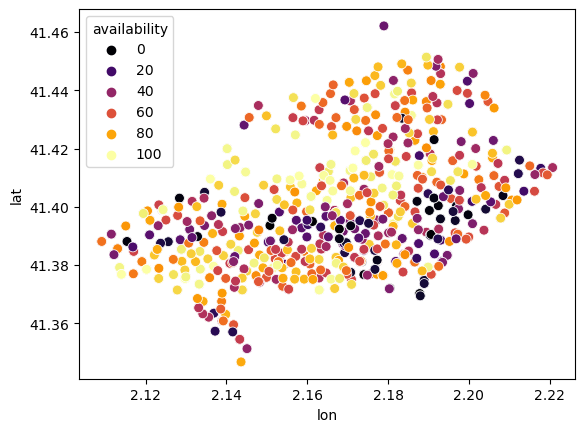

In [203]:
sns.scatterplot(data=data_8am_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

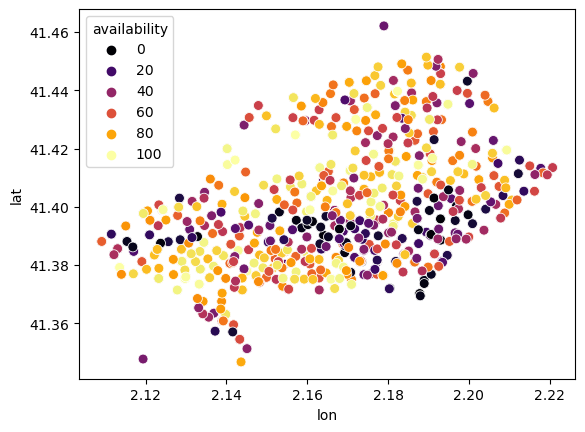

In [204]:
sns.scatterplot(data=data_10am_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

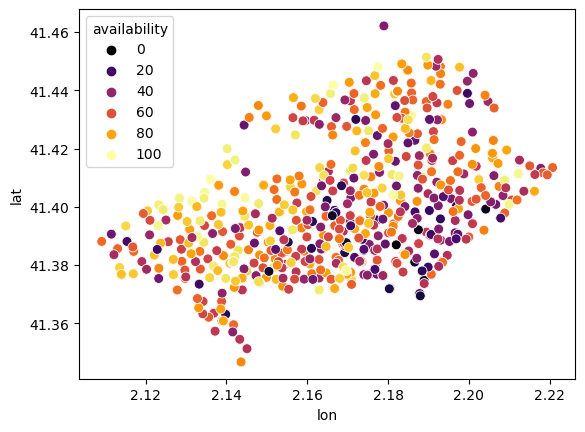

In [205]:
sns.scatterplot(data=data_2pm_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

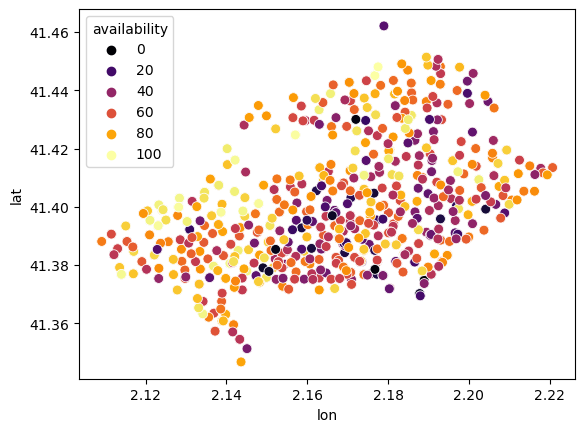

In [206]:
sns.scatterplot(data=data_4pm_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

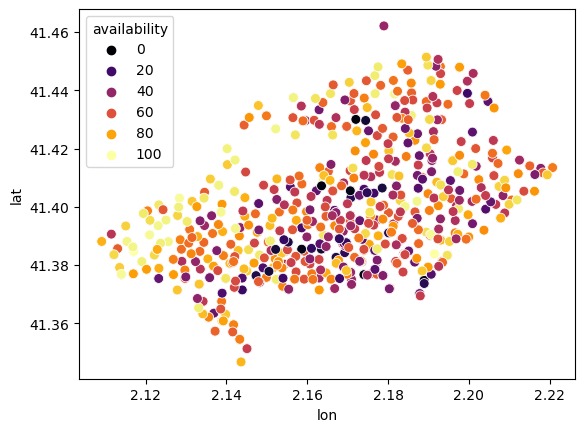

In [207]:
sns.scatterplot(data=data_6pm_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

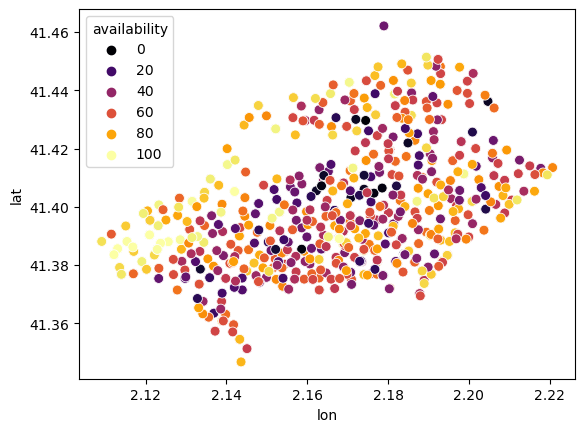

In [208]:
sns.scatterplot(data=data_8pm_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

<AxesSubplot:xlabel='lon', ylabel='lat'>

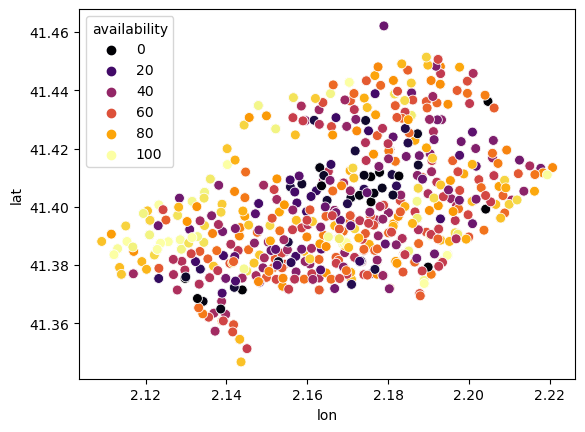

In [209]:
sns.scatterplot(data=data_10pm_weekday, x="lon", y="lat", hue="availability", s=50, palette="inferno")

### Altura Graph

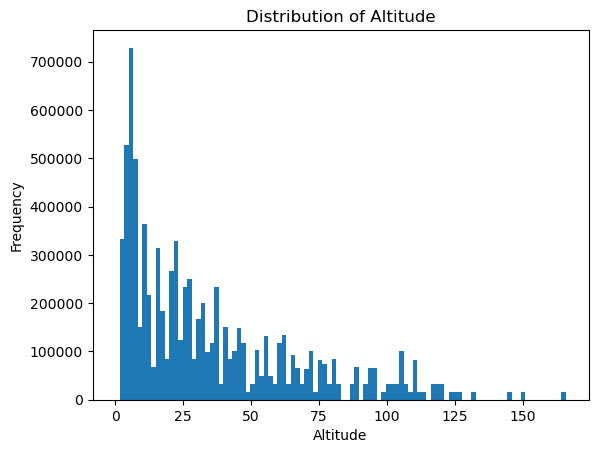

In [96]:
plt.hist(data_all_columns["altitude"], bins=100)  # Adjust the number of bins as needed
plt.xlabel("Altitude")
plt.ylabel("Frequency")
plt.title("Distribution of Altitude")
plt.show()

Text(0.5, 1.0, 'Mean Availability by Altitude and Hour')

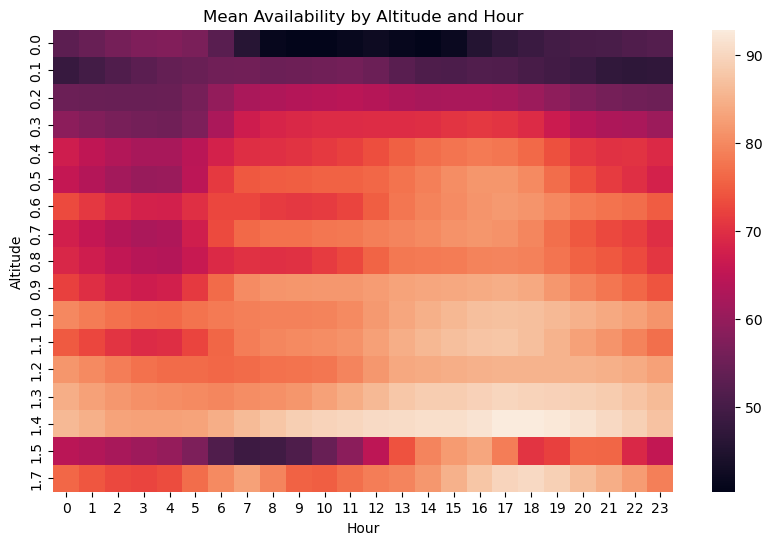

In [87]:
data_weekday = data_all_columns[data_all_columns['day_category'].isin([1])]

data_all_columns['altitude_cat'] = (data_all_columns['altitude'] / 100).round(1)


altitude_hour_availability = data_all_columns.groupby(["altitude_cat", "hour"])["availability"].mean().reset_index()
pivoted_altitude_hour = altitude_hour_availability.pivot("altitude_cat", "hour", "availability")


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pivoted_altitude_hour)

heatmap.set_xlabel("Hour")
heatmap.set_ylabel("Altitude")

plt.title("Mean Availability by Altitude and Hour")


Text(0.5, 1.0, 'Mean Availability by Altitude and Hour')

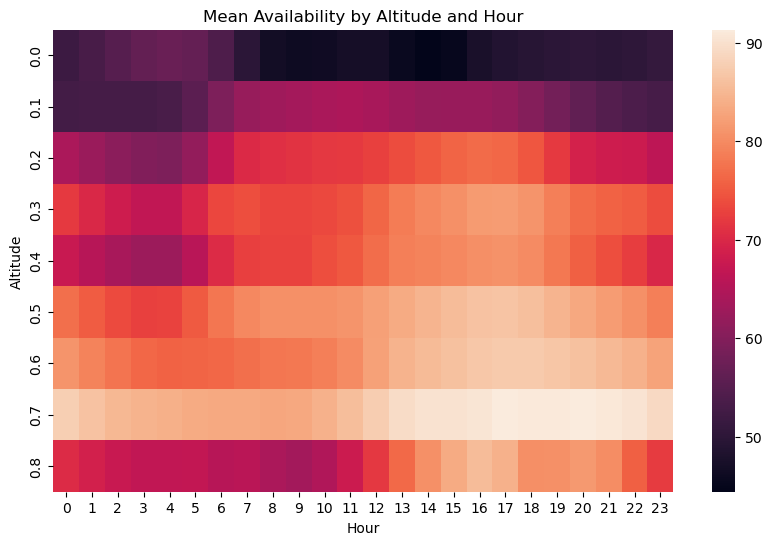

In [92]:
data_weekday = data_all_columns[data_all_columns['day_category'].isin([1])]

data_all_columns['altitude_cat'] = (data_all_columns['altitude'] / 200).round(1)


altitude_hour_availability = data_all_columns.groupby(["altitude_cat", "hour"])["availability"].mean().reset_index()
pivoted_altitude_hour = altitude_hour_availability.pivot("altitude_cat", "hour", "availability")


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pivoted_altitude_hour)

heatmap.set_xlabel("Hour")
heatmap.set_ylabel("Altitude")

plt.title("Mean Availability by Altitude and Hour")

In [99]:
low_altitude_data = data_all_columns[data_all_columns["altitude"]<100]

/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/954972536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_altitude_data['altitude_cat'] = (low_altitude_data['altitude'] / 100).round(1)


Text(0.5, 1.0, 'Mean Availability by Height and Hour')

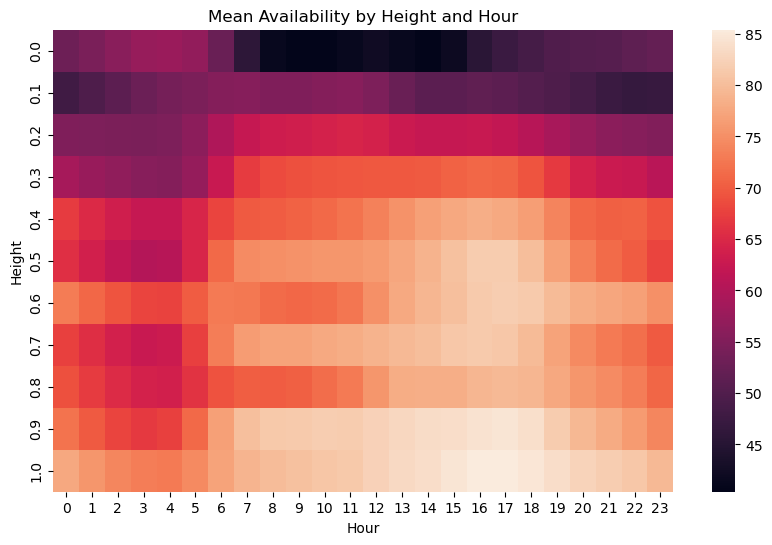

In [107]:
data_weekday = low_altitude_data[low_altitude_data['day_category'].isin([1])]

low_altitude_data['altitude_cat'] = (low_altitude_data['altitude'] / 100).round(1)


altitude_hour_availability = low_altitude_data.groupby(["altitude_cat", "hour"])["availability"].mean().reset_index()
pivoted_altitude_hour = altitude_hour_availability.pivot("altitude_cat", "hour", "availability")


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pivoted_altitude_hour)

heatmap.set_xlabel("Hour")
heatmap.set_ylabel("Height")

plt.title("Mean Availability by Height and Hour")


/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/4211613281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  very_low_altitude_data['altitude_cat'] = (very_low_altitude_data['altitude'] / 100).round(1)


Text(0.5, 1.0, 'Mean Availability by Altitude and Hour')

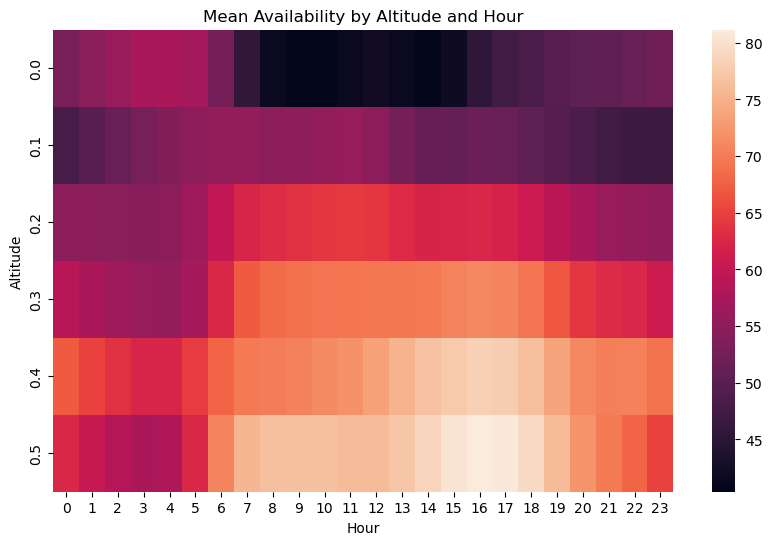

In [106]:
very_low_altitude_data = data_all_columns[data_all_columns["altitude"]<50]
data_weekday = very_low_altitude_data[very_low_altitude_data['day_category'].isin([1])]

very_low_altitude_data['altitude_cat'] = (very_low_altitude_data['altitude'] / 100).round(1)


altitude_hour_availability = very_low_altitude_data.groupby(["altitude_cat", "hour"])["availability"].mean().reset_index()
pivoted_altitude_hour = altitude_hour_availability.pivot("altitude_cat", "hour", "availability")


plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pivoted_altitude_hour)

heatmap.set_xlabel("Hour")
heatmap.set_ylabel("Altitude")

plt.title("Mean Availability by Altitude and Hour")


# Rain visualizations

In [138]:
import pandas as pd
import numpy as np

rain_data = pd.read_csv("newColumns.csv",low_memory=False)


In [139]:
rain_data

,day,month,year,hour,VALOR_LECTURA,holiday
0,1,1,2021,0,0.0,True
1,1,1,2021,1,0.0,True
2,1,1,2021,2,0.0,True
3,1,1,2021,3,0.0,True
4,1,1,2021,4,0.0,True
...,...,...,...,...,...,...
26300,31,12,2023,20,0.0,False
26301,31,12,2023,21,0.0,False
26302,31,12,2023,22,0.0,False
26303,31,12,2023,23,0.0,False


In [140]:
merge_df = pd.merge(data_all_columns, rain_data, how='left',
                left_on=['day','month','year','hour'],
                right_on=['day','month','year','hour'])

In [141]:
no_rain = merge_df[merge_df['VALOR_LECTURA_x']==0]

In [142]:
no_rain

,station_id,year,month,day,weekday,hour,availability,availability_1h_before,availability_2h_before,availability_3h_before,...,lon,altitude,post_code,capacity,VALOR_LECTURA_x,holiday_x,day_category,altitude_cat,VALOR_LECTURA_y,holiday_y
0,1,2021.0,1.0,1.0,4.0,0,11.956522,6.702899,5.253623,4.528986,...,2.180107,16.0,8013.0,46.0,0.0,True,2,0.1,0.0,True
1,2,2021.0,1.0,1.0,4.0,0,49.002849,47.474747,39.814815,52.469136,...,2.177198,17.0,8013.0,27.0,0.0,True,2,0.1,0.0,True
2,3,2021.0,1.0,1.0,4.0,0,80.000000,83.666667,82.666667,78.333333,...,2.181331,11.0,8013.0,27.0,0.0,True,2,0.1,0.0,True
3,4,2021.0,1.0,1.0,4.0,0,42.460317,30.158730,28.571429,26.984127,...,2.181248,8.0,8013.0,21.0,0.0,True,2,0.0,0.0,True
4,5,2021.0,1.0,1.0,4.0,0,76.456876,79.487179,78.632479,70.512821,...,2.180176,7.0,8018.0,39.0,0.0,True,2,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447847,515,2022.0,1.0,13.0,3.0,10,97.916667,91.666667,91.666667,87.878788,...,2.194800,19.0,8030.0,24.0,0.0,False,1,0.1,0.0,False
8447848,516,2022.0,1.0,13.0,3.0,10,25.396825,23.809524,23.809524,23.809524,...,2.200157,15.0,8030.0,21.0,0.0,False,1,0.1,0.0,False
8447849,517,2022.0,1.0,13.0,3.0,10,30.000000,30.000000,30.000000,30.000000,...,2.178959,44.0,8033.0,20.0,0.0,False,1,0.2,0.0,False
8447850,518,2022.0,1.0,13.0,3.0,10,100.000000,100.000000,97.222222,91.049383,...,2.157049,112.0,8032.0,27.0,0.0,False,1,0.6,0.0,False


In [158]:
rainy_hours = merge_df[merge_df['VALOR_LECTURA_x']>0][merge_df['VALOR_LECTURA_x']<1]

/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/3242232852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rainy_hours = merge_df[merge_df['VALOR_LECTURA_x']>0][merge_df['VALOR_LECTURA_x']<1]


In [159]:
rainy_hours

,station_id,year,month,day,weekday,hour,availability,availability_1h_before,availability_2h_before,availability_3h_before,...,lon,altitude,post_code,capacity,VALOR_LECTURA_x,holiday_x,day_category,altitude_cat,VALOR_LECTURA_y,holiday_y
5049,1,2021.0,1.0,1.0,4.0,10,47.463768,47.644928,45.108696,5.518395,...,2.180107,16.0,8013.0,46.0,0.1,True,2,0.1,0.1,True
5050,2,2021.0,1.0,1.0,4.0,10,57.716049,56.172840,55.555556,52.421652,...,2.177198,17.0,8013.0,27.0,0.1,True,2,0.1,0.1,True
5051,3,2021.0,1.0,1.0,4.0,10,64.333333,68.000000,66.000000,64.000000,...,2.181331,11.0,8013.0,27.0,0.1,True,2,0.1,0.1,True
5052,4,2021.0,1.0,1.0,4.0,10,13.553114,28.138528,28.571429,31.349206,...,2.181248,8.0,8013.0,21.0,0.1,True,2,0.0,0.1,True
5053,5,2021.0,1.0,1.0,4.0,10,75.888439,73.504274,72.189349,71.794872,...,2.180176,7.0,8018.0,39.0,0.1,True,2,0.0,0.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288012,515,2022.0,12.0,21.0,2.0,2,62.500000,62.500000,62.500000,62.500000,...,2.194800,19.0,8030.0,24.0,0.1,False,1,0.1,0.1,False
8288013,516,2022.0,12.0,21.0,2.0,2,28.571429,28.571429,28.571429,28.571429,...,2.200157,15.0,8030.0,21.0,0.1,False,1,0.1,0.1,False
8288014,517,2022.0,12.0,21.0,2.0,2,35.000000,35.000000,35.000000,42.083333,...,2.178959,44.0,8033.0,20.0,0.1,False,1,0.2,0.1,False
8288015,518,2022.0,12.0,21.0,2.0,2,80.769231,82.371795,84.615385,86.217949,...,2.157049,112.0,8032.0,27.0,0.1,False,1,0.6,0.1,False


In [161]:
rainy_hours['Rain'] = rainy_hours['VALOR_LECTURA_x']

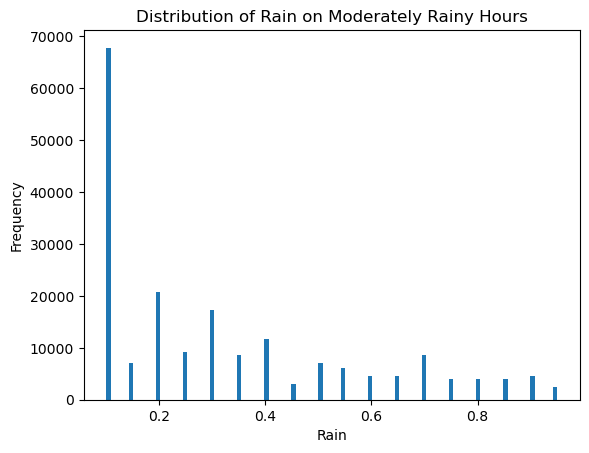

In [165]:
plt.hist(rainy_hours['VALOR_LECTURA_x'], bins=100)  # Adjust the number of bins as needed
plt.xlabel("Rain")
plt.ylabel("Frequency")
plt.title("Distribution of Rain on Moderately Rainy Hours")
plt.show()

In [169]:
very_rainy_hours = merge_df[merge_df['VALOR_LECTURA_x']>1]

In [170]:
very_rainy_hours['Rain'] = very_rainy_hours['VALOR_LECTURA_x']

/var/folders/9h/_2bn_v7j5b783n0g3l3zlzyh0000gn/T/ipykernel_34087/1512563998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  very_rainy_hours['Rain'] = very_rainy_hours['VALOR_LECTURA_x']


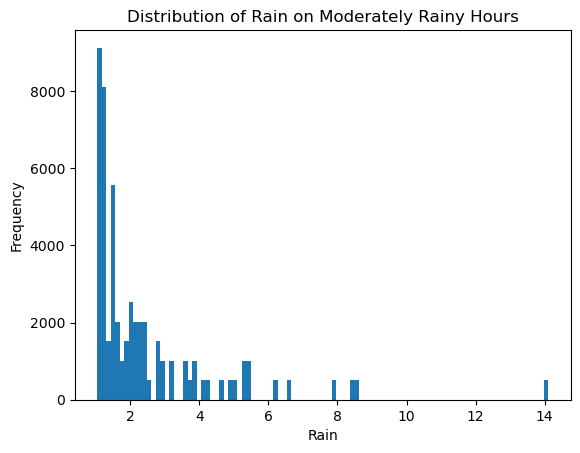

In [171]:
plt.hist(very_rainy_hours['Rain'], bins=100)  # Adjust the number of bins as needed
plt.xlabel("Rain")
plt.ylabel("Frequency")
plt.title("Distribution of Rain on Moderately Rainy Hours")
plt.show()

<AxesSubplot:xlabel='lon', ylabel='lat'>

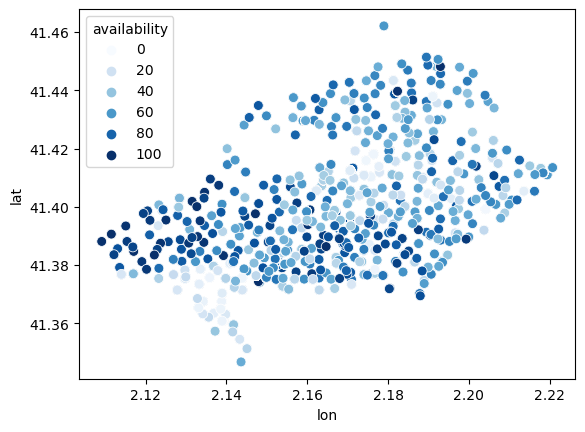

In [192]:
sns.scatterplot(data=very_rainy_hours, x="lon", y="lat", hue="availability", s=50, palette="Blues")

<AxesSubplot:xlabel='lon', ylabel='lat'>

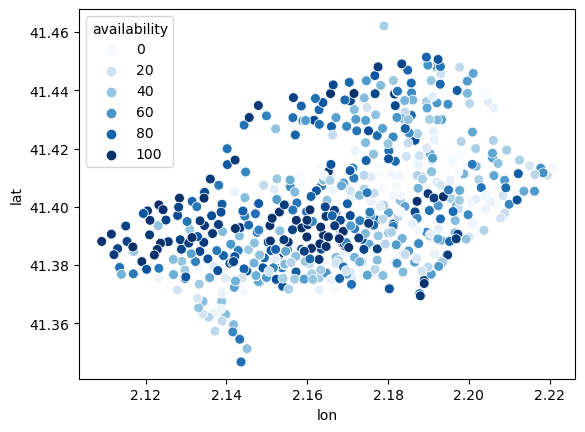

In [195]:
sns.scatterplot(data=rainy_hours, x="lon", y="lat", hue="availability", s=50, palette="Blues")

<AxesSubplot:xlabel='lon', ylabel='lat'>

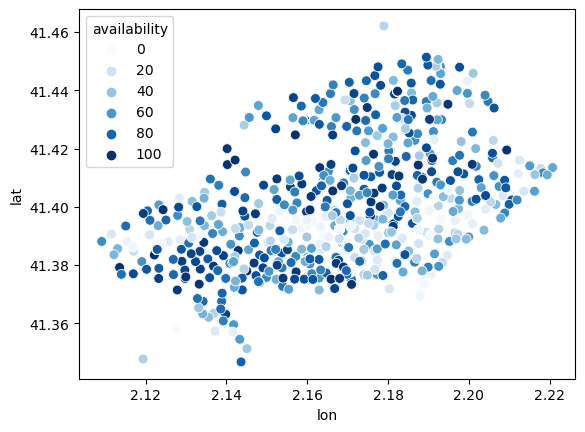

In [197]:
sns.scatterplot(data=no_rain, x="lon", y="lat", hue="availability", s=50, palette="Blues")